### Differential Growth Simulation in Python

Differential growth is an exciting computational pattern often used in generative art and scientific simulations to simulate growth processes like plant growth or cellular dynamics. Below is an example Python program demonstrating differential growth using Python, implemented in a Jupyter Notebook.

This code models differential growth by simulating a growing curve, ensuring local repulsion and controlling edge constraints.


Iteration 0 - Points: 200 Time: 0.0095 seconds


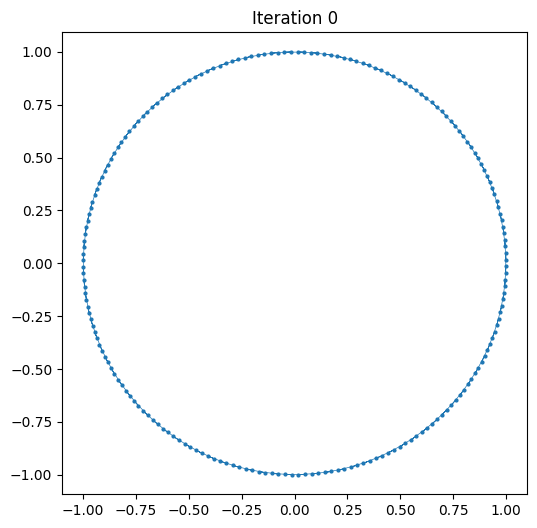

Iteration 1 - Points: 400 Time: 0.0250 seconds
Iteration 2 - Points: 800 Time: 0.0861 seconds
Iteration 3 - Points: 1600 Time: 0.3556 seconds
Iteration 4 - Points: 3200 Time: 1.3175 seconds
Iteration 5 - Points: 6400 Time: 5.1888 seconds
Iteration 6 - Points: 6400 Time: 5.1638 seconds
Iteration 7 - Points: 6400 Time: 5.1515 seconds
Iteration 8 - Points: 6400 Time: 5.1635 seconds
Iteration 9 - Points: 6400 Time: 5.1894 seconds
Iteration 10 - Points: 6400 Time: 5.2373 seconds
Iteration 11 - Points: 6400 Time: 5.3032 seconds
Iteration 12 - Points: 6400 Time: 5.3247 seconds
Iteration 13 - Points: 6400 Time: 5.3439 seconds
Iteration 14 - Points: 6400 Time: 5.5009 seconds
Iteration 15 - Points: 6400 Time: 5.5707 seconds
Iteration 16 - Points: 6400 Time: 5.6256 seconds
Iteration 17 - Points: 6400 Time: 5.4497 seconds
Iteration 18 - Points: 6400 Time: 5.6384 seconds
Iteration 19 - Points: 6400 Time: 5.9862 seconds
Iteration 20 - Points: 6400 Time: 5.6222 seconds


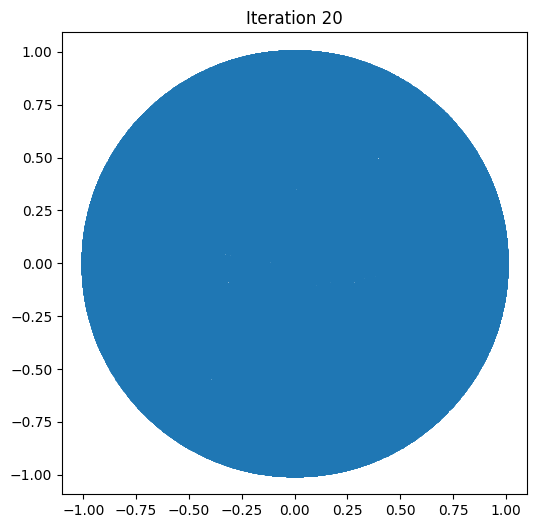

Iteration 21 - Points: 6400 Time: 5.5274 seconds
Iteration 22 - Points: 6400 Time: 5.4567 seconds
Iteration 23 - Points: 6400 Time: 5.6310 seconds
Iteration 24 - Points: 6400 Time: 5.6224 seconds
Iteration 25 - Points: 6400 Time: 5.6320 seconds
Iteration 26 - Points: 6400 Time: 6.0056 seconds
Iteration 27 - Points: 6400 Time: 5.9944 seconds
Iteration 28 - Points: 6400 Time: 5.7340 seconds
Iteration 29 - Points: 6400 Time: 5.6157 seconds
Iteration 30 - Points: 6400 Time: 5.5357 seconds
Iteration 31 - Points: 6400 Time: 5.5301 seconds
Iteration 32 - Points: 6400 Time: 5.5280 seconds
Iteration 33 - Points: 6400 Time: 5.5652 seconds
Iteration 34 - Points: 6400 Time: 5.5991 seconds
Iteration 35 - Points: 6400 Time: 5.5493 seconds
Iteration 36 - Points: 6400 Time: 5.4518 seconds
Iteration 37 - Points: 6400 Time: 5.9057 seconds
Iteration 38 - Points: 6400 Time: 5.6845 seconds
Iteration 39 - Points: 6400 Time: 5.6105 seconds
Iteration 40 - Points: 6400 Time: 5.6130 seconds


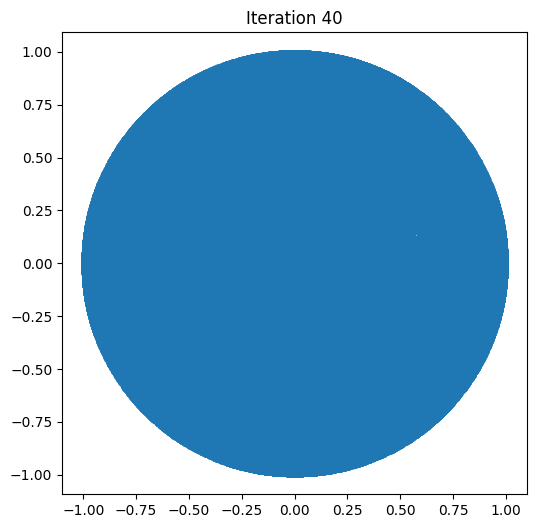

Iteration 41 - Points: 6400 Time: 5.9992 seconds
Iteration 42 - Points: 6400 Time: 5.6782 seconds
Iteration 43 - Points: 6400 Time: 5.6203 seconds


KeyboardInterrupt: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.spatial import cKDTree

# Parameters
num_points = 100         # Number of points on the curve
growth_rate = 0.05       # Growth rate per iteration
repulsion_distance = 0.1 # Distance to maintain between points
iterations = 200         # Number of iterations

# Initialize points in a circular shape
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
points = np.column_stack((np.cos(angles), np.sin(angles)))

def distance(p1, p2):
    """Calculate Euclidean distance between two points."""
    return np.linalg.norm(p1 - p2)

def apply_repulsion(points, repulsion_distance):
    """Apply repulsion between points to maintain minimum spacing."""
    new_points = points.copy()
    for i, p in enumerate(points):
        for j, q in enumerate(points):
            if i != j and distance(p, q) < repulsion_distance:
                diff = p - q
                diff = diff / np.linalg.norm(diff) * (repulsion_distance - np.linalg.norm(diff))
                new_points[i] += diff * 0.5
    return new_points

def grow_curve(points, growth_rate):
    """Grow the curve by adding new points between existing ones."""
    new_points = []
    for i in range(len(points)):
        p1 = points[i]
        p2 = points[(i + 1) % len(points)]
        new_points.append(p1)
        new_points.append(p1 + growth_rate * (p2 - p1))
    return np.array(new_points)


def apply_repulsion_optimized(points, repulsion_distance):
    """Apply repulsion using KD-Tree for improved performance."""
    tree = cKDTree(points)
    new_points = points.copy()
    for i, point in enumerate(points):
        # Find neighbors within the repulsion distance
        neighbors = tree.query_ball_point(point, repulsion_distance)
        for j in neighbors:
            if i != j:
                diff = points[i] - points[j]
                distance = np.linalg.norm(diff)
                if distance < repulsion_distance:
                    adjustment = diff / distance * (repulsion_distance - distance)
                    new_points[i] += adjustment * 0.5
    return new_points


def apply_repulsion_vectorized(points, repulsion_distance):
    """Vectorized repulsion using NumPy."""
    displacement = np.zeros_like(points)
    for i in range(len(points)):
        diffs = points - points[i]  # Vector difference with all other points
        distances = np.linalg.norm(diffs, axis=1)
        mask = (distances < repulsion_distance) & (distances > 0)
        forces = diffs[mask] / distances[mask, None] * (repulsion_distance - distances[mask])[:, None]
        displacement[i] += forces.sum(axis=0)
    return points + displacement * 0.5



# Parameters
iterations = 200
max_points = 5000  # Limit to avoid exponential growth

for iteration in range(iterations):
    start = time.time()

    # Limit point growth
    if len(points) < max_points:
        points = grow_curve(points, growth_rate)

    # Optimized repulsion
    points = apply_repulsion_optimized(points, repulsion_distance)

    # Normalize the curve
    points = points / np.linalg.norm(points, axis=1)[:, None]

    elapsed = time.time() - start
    print(f"Iteration {iteration} - Points: {len(points)} Time: {elapsed:.4f} seconds")

    # Stop if time exceeds a threshold
    if elapsed > 15.0:
        print("Iteration took too long; exiting.")
        break

    if iteration % 20 == 0:  # Plot every 20 iterations
        plt.figure(figsize=(6, 6))
        plt.plot(points[:, 0], points[:, 1], 'o-', markersize=2, linewidth=0.5)
        plt.axis('equal')
        plt.title(f"Iteration {iteration}")
        plt.show()





### Explanation

1. **Initialization**:
   - Points are initialized in a circular pattern to form the initial shape of the curve.
   
2. **Growth**:
   - Each iteration adds new points between existing points, mimicking growth.

3. **Repulsion**:
   - The repulsion mechanism ensures that points do not overlap, maintaining a smooth structure.

4. **Visualization**:
   - The evolving curve is visualized every few iterations to observe its growth.

### How to Run
- Copy the code into a Jupyter Notebook cell.
- Execute the cell to visualize the differential growth process.

You can tweak parameters like `growth_rate`, `repulsion_distance`, and `iterations` to observe different behaviors. Let me know if you'd like further extensions or explanations!